In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../DATA/data_banknote_authentication.csv")
df.head()

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Variance_Wavelet  1372 non-null   float64
 1   Skewness_Wavelet  1372 non-null   float64
 2   Curtosis_Wavelet  1372 non-null   float64
 3   Image_Entropy     1372 non-null   float64
 4   Class             1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [4]:
df.isna().sum()

Variance_Wavelet    0
Skewness_Wavelet    0
Curtosis_Wavelet    0
Image_Entropy       0
Class               0
dtype: int64

In [5]:
df.Class.unique()

array([0, 1])

In [6]:
X = df.drop('Class', axis=1)

In [7]:
y = df['Class']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
model = RandomForestClassifier(n_estimators=140, max_features='log2', random_state=101)

In [12]:
model.fit(X_train, y_train)

RandomForestClassifier(max_features='log2', n_estimators=140, random_state=101)

In [13]:
y_predicted = model.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [15]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[234,   4],
       [  0, 174]])

In [17]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       238
           1       0.98      1.00      0.99       174

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



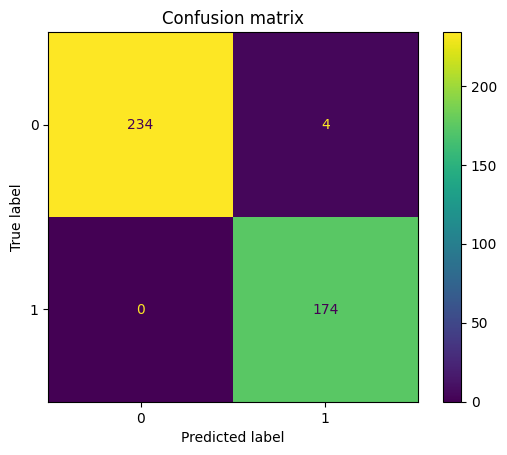

In [18]:
disp = ConfusionMatrixDisplay(cm, display_labels=['0', '1'])
disp.plot()
plt.title('Confusion matrix')

plt.show()

In [21]:
pd.DataFrame(model.feature_importances_, columns=['feature_importatnces']).sort_values('feature_importatnces')

,feature_importatnces
3,0.049138
2,0.154350
1,0.228145
0,0.568366
